In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
from scipy.stats import norm, skew, kurtosis
import seaborn as sns


# These libraries are for machine learning modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
file_path = r"studytime.csv" # put in your own path
df = pd.read_csv(file_path)
# Keep only the first 13 columns
df = df.iloc[:, :13]

# Keep only rows from index 0 to 28 (inclusive)
df = df.iloc[0:29]

In [3]:
# take a look at the first 10 values to get an idea
print(df)

      id Subject  Mood   StartDate StartTime     EndDate   EndTime Duration  \
0    2.0      SE   3.0  10/21/2024  15:30:00  10/21/2024  17:22:00  1:52:00   
1    4.0     PBR   5.0  10/22/2024  14:17:45  10/22/2024  15:23:22  1:05:37   
2    9.0      SE   1.0  10/29/2024  15:32:01  10/29/2024  16:54:28  1:22:27   
3   12.0     PPI   4.0  10/30/2024  16:56:46  10/30/2024  18:00:46  1:04:00   
4   16.0     PBR   6.0   11/7/2024  14:30:00   11/7/2024  17:00:00  2:30:00   
5   19.0      DT   7.0  11/12/2024  16:13:36  11/12/2024  18:28:49  2:15:13   
6   22.0     PPI   7.0  11/13/2024  15:28:27  11/13/2024  16:07:29  0:45:14   
7   23.0     PBR   4.0  11/13/2024  16:17:20  11/13/2024  17:24:24  1:07:04   
8   27.0      DT   5.0  11/19/2024  15:16:38  11/19/2024  17:48:11  2:31:32   
9   29.0     PPI   2.0  11/20/2024  16:41:52  11/20/2024  17:17:59  0:36:06   
10   1.0      SE   1.0  10/21/2024  14:00:00  10/21/2024  14:30:00  0:30:00   
11   7.0     PBR   3.0  10/23/2024  13:26:11  10/23/

In [4]:
#Determining morning session
print(df.shape)

(29, 13)


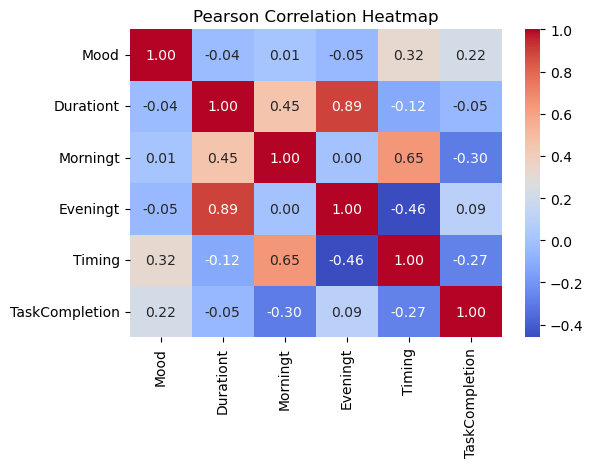

In [5]:
# Select specific columns
selected_columns = ['Mood', 'Durationt', 'Morningt', 'Eveningt', 'Timing', 'TaskCompletion']
data_selected = df[selected_columns]

# Compute the correlation matrix
corr_matrix = data_selected.corr()

# Compute correlation matrices
pearson_corr = data_selected.corr(method='pearson')  # Pearson correlation
spearman_corr = data_selected.corr(method='spearman')  # Spearman correlation

# Plot Pearson correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap')
plt.show()


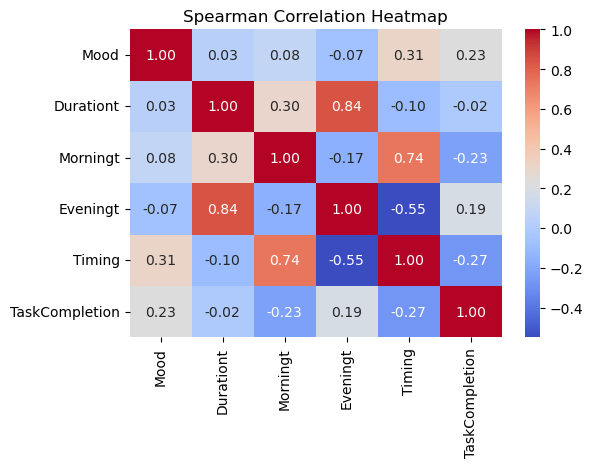

In [6]:
# Plot Spearman correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap')
plt.show()

In [7]:
# save interesting variables in easy-to-access variables
Subject = df["Subject"]
Mood = df["Mood"]
date = df["StartDate"]
Durationt = df["Durationt"] / 60
StartTime = df["StartTime"]
EndTime = df["EndTime"]
TaskCompletion = df["TaskCompletion"]
Timing = df["Timing"].astype(int)

In [8]:
TaskCompletion = TaskCompletion.astype(int)
TaskCompletion.head(20)

0     1
1     1
2     0
3     1
4     1
5     1
6     0
7     0
8     1
9     0
10    0
11    1
12    0
13    0
14    0
15    0
16    1
17    0
18    0
19    0
Name: TaskCompletion, dtype: int32

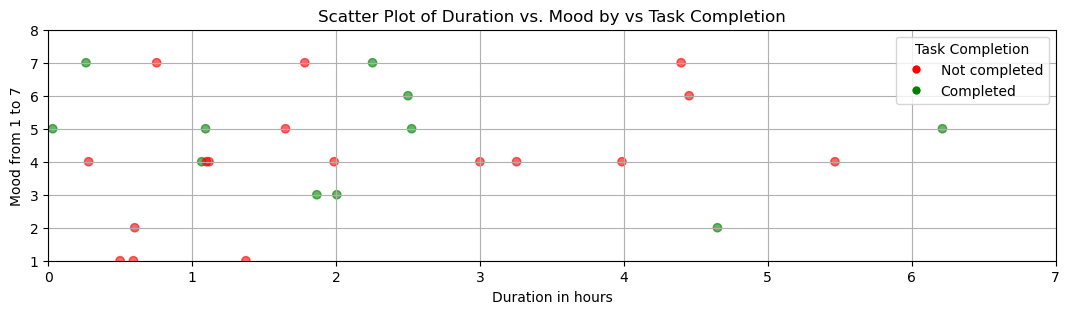

In [9]:
# Create a scatter plot
plt.figure(figsize=(13, 3))
plt.grid(True)


# Define colors based on the status
colors = TaskCompletion.map({0: 'red', 1: 'green'})

# let's take a look at the relationship between two variables through a scatter plot
plt.scatter(Durationt, Mood, color=colors, alpha=0.6)
plt.xlabel("Duration in hours")
plt.ylabel("Mood from 1 to 7")
plt.xlim(0, 7)
plt.ylim(1, 8)


legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Not completed', markerfacecolor='red', markersize=7),
    Line2D([0], [0], marker='o', color='w', label='Completed', markerfacecolor='green', markersize=7)
]
plt.legend(handles=legend_elements, title="Task Completion")

# Show plot
plt.title('Scatter Plot of Duration vs. Mood by vs Task Completion')
plt.show()


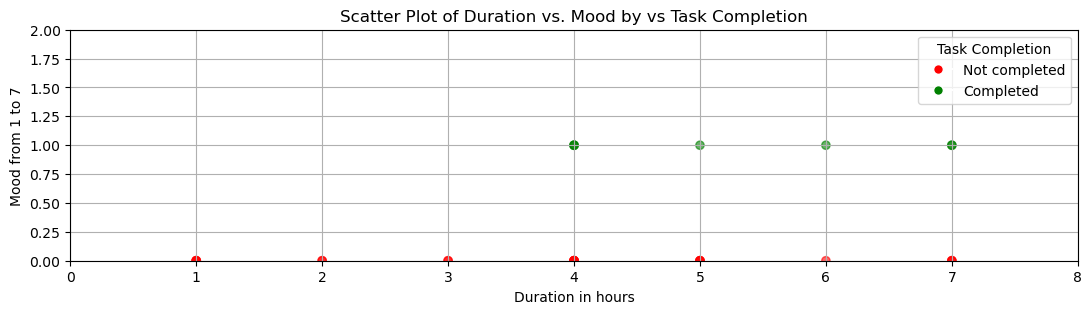

In [10]:
# Create a scatter plot
plt.figure(figsize=(13, 3))
plt.grid(True)


# Define colors based on the status
colors = Timing.map({0: 'red', 1: 'green'})

# let's take a look at the relationship between two variables through a scatter plot
plt.scatter(Mood, Timing, color=colors, alpha=0.6)
plt.xlabel("Duration in hours")
plt.ylabel("Mood from 1 to 7")
plt.xlim(0, 8)
plt.ylim(0, 2)


legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Not completed', markerfacecolor='red', markersize=7),
    Line2D([0], [0], marker='o', color='w', label='Completed', markerfacecolor='green', markersize=7)
]
plt.legend(handles=legend_elements, title="Task Completion")

# Show plot
plt.title('Scatter Plot of Duration vs. Mood by vs Task Completion')
plt.show()


In [11]:
Mood = df[["Mood"]]

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(Mood, Timing, test_size=0.2, random_state=17)

In [12]:
# Initialize and fit logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [13]:
# Predict on test set
y_pred = model.predict(x_test)

In [14]:
# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.00      0.00      0.00         2

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
# Get the coefficients
beta_0 = model.intercept_[0]  # Intercept
beta_1 = model.coef_[0][0]     # Coefficient for the independent variable

# Calculate x where P(y=1|x) = 0.5
if beta_1 != 0:
    x_half_prob = -beta_0 / beta_1
else:
    x_half_prob = None  # Handle case where slope is zero

# Display the result
print(f'The value of x where P(y=1|x) = 0.5 is: {x_half_prob}')

The value of x where P(y=1|x) = 0.5 is: 8.895315305925092


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


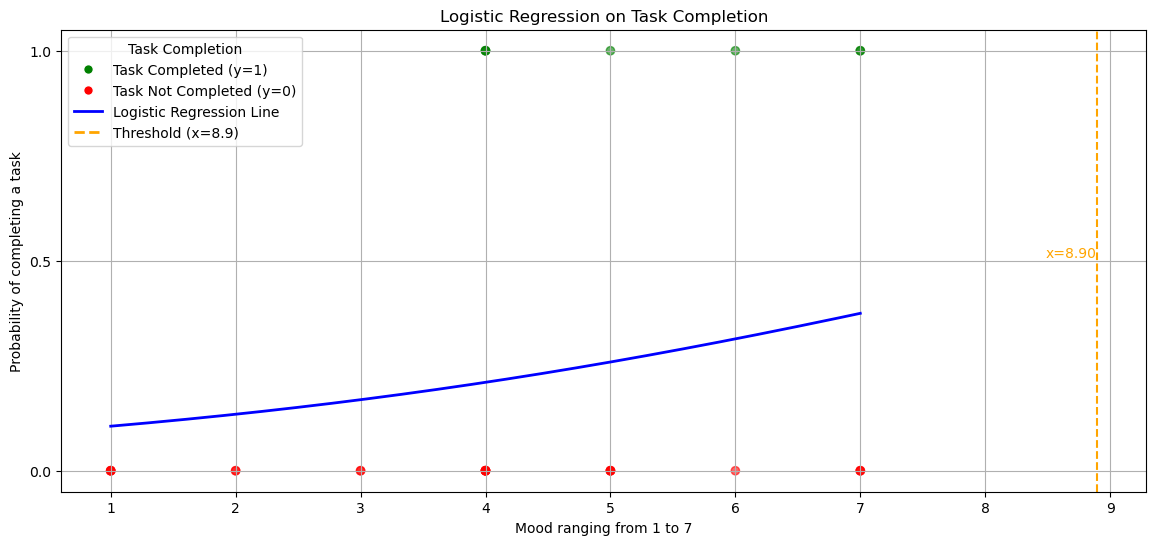

In [16]:
# Plot the data points
plt.figure(figsize=(14, 6))
plt.scatter(Mood, Timing, color=colors, alpha=0.6)

# Plot the logistic curve
x_values = np.linspace(1, 7, 300).reshape(-1, 1)
y_prob = model.predict_proba(x_values)[:, 1]  # Probability that y=1
plt.plot(x_values, y_prob, color='blue', linewidth=2, label='Logistic Regression Curve')

# Plot the vertical line to show the threshold of the logistic regression
plt.axvline(x=x_half_prob, color='orange', linestyle='--', label=f'Threshold (P=0.5 at x={x_half_prob:.2f})')
plt.text(x_half_prob, 0.5, f'x={x_half_prob:.2f}', color='orange', horizontalalignment='right', verticalalignment='bottom', fontsize=10)



# Labels and legend
plt.title('Logistic Regression on Task Completion')
plt.xlabel('Mood ranging from 1 to 7')
plt.ylabel('Probability of completing a task')
plt.yticks([0, 0.5, 1])

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Task Completed (y=1)', 
           markerfacecolor='green', markersize=7),
    Line2D([0], [0], marker='o', color='w', label='Task Not Completed (y=0)', 
           markerfacecolor='red', markersize=7),
    Line2D([0], [0], color='blue', lw=2, label='Logistic Regression Line'),
    Line2D([0], [0], color='orange', lw=2, linestyle='--', label='Threshold (x=8.9)')
]

plt.legend(handles=legend_elements, title="Task Completion")


plt.grid(True)
plt.show()

In [17]:
# Generate sample data for multiple groups
data1 = df[df['Subject'] == 'DT']["Durationt"]
data2 = df[df['Subject'] == 'SE']["Durationt"]
data3 = df[df['Subject'] == 'Challenge1']["Durationt"]
data4 = df[df['Subject'] == 'DBW']["Durationt"]
data5 = df[df['Subject'] == 'PPI']["Durationt"]
data6 = df[df['Subject'] == 'PBR']["Durationt"]
labels = ['DT', 'SE', 'Chall 1', 'DBW', 'PPI', 'PBR']

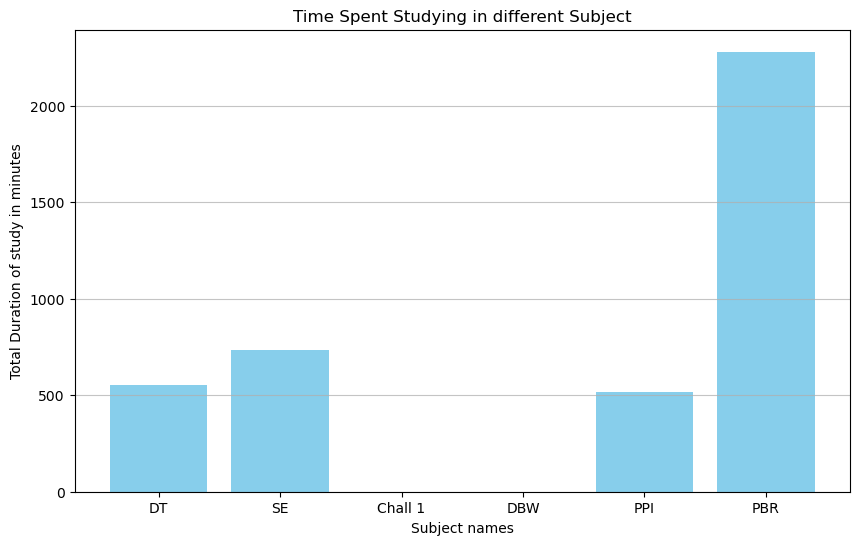

In [18]:
values = [data1.sum(), data2.sum(), data3.sum(), data4.sum(), data5.sum(), data6.sum()]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='skyblue')

# Add title and labels
plt.title('Time Spent Studying in different Subject')
plt.xlabel('Subject names')
plt.ylabel('Total Duration of study in minutes')

# Show the plot
plt.grid(axis='y', alpha=0.75)
plt.show()

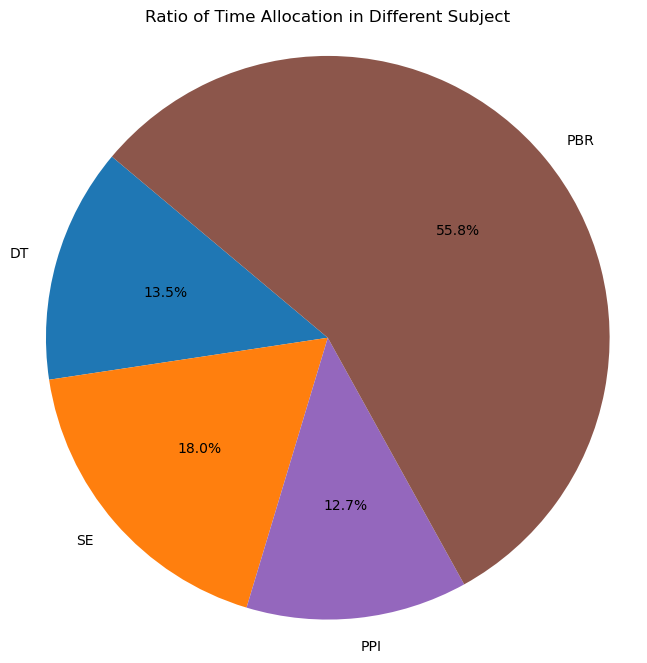

In [19]:
colors = ['#1f77b4', '#ff7f0e', '#9467bd', '#8c564b']  # The six colors
labels = ['DT', 'SE', 'PPI', 'PBR']

values = [data1.sum(), data2.sum(), data5.sum(), data6.sum()]


# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Ratio of Time Allocation in Different Subject')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


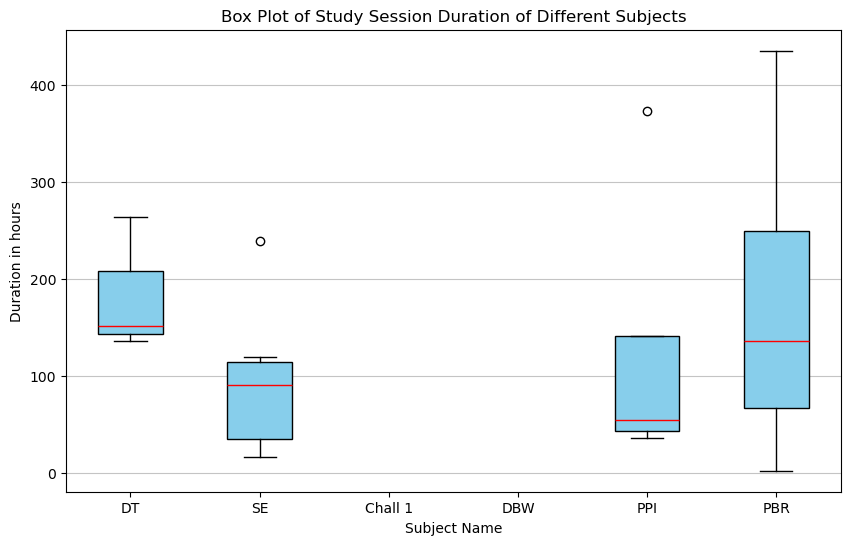

In [20]:
# Combine data into a list
data = [data1, data2, data3, data4, data5, data6]
labels = ['DT', 'SE', 'Chall 1', 'DBW', 'PPI', 'PBR']


# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data, vert=True, patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='black'),
            medianprops=dict(color='red'), whiskerprops=dict(color='black'))

# Add title and labels
plt.title('Box Plot of Study Session Duration of Different Subjects')
plt.xlabel('Subject Name')
plt.ylabel('Duration in hours')
plt.xticks([1, 2, 3, 4, 5, 6], labels)  # Custom x-axis labels

# Show the plot
plt.grid(axis='y', alpha=0.75)
plt.show()


In [21]:
# Calculate mean and standard deviation

Durationt = df["Durationt"]

mean = Durationt.mean()
std_dev = Durationt.std()

print(mean, std_dev)


140.73206896551724 114.0804518555502


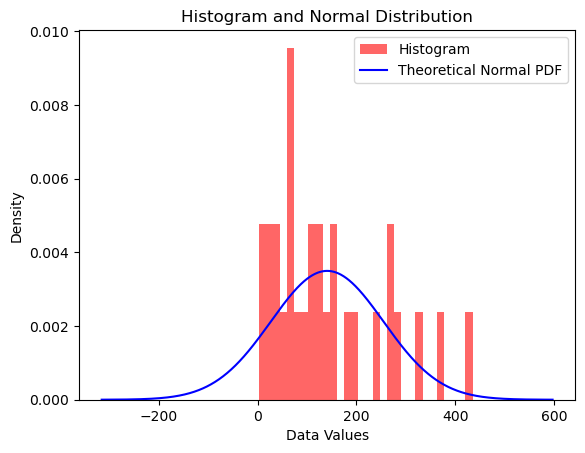

In [22]:


# Generate x values
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

# Calculate the PDF
pdf = norm.pdf(x, mean, std_dev)

# Plot histogram and theoretical PDF
plt.hist(Durationt, bins=30, density=True, alpha=0.6, color='red', label='Histogram')
plt.plot(x, pdf, color='blue', label='Theoretical Normal PDF')
plt.title('Histogram and Normal Distribution')
plt.xlabel('Data Values')
plt.ylabel('Density')
plt.legend()
plt.show()

In [23]:
# Calculate skewness and kurtosis
data_skewness = skew(Durationt)
data_kurtosis = kurtosis(Durationt, fisher=True)  # Fisher=True gives excess kurtosis (subtracts 3 for normality)

print(f"Skewness: {data_skewness:.2f}")
print(f"Kurtosis: {data_kurtosis:.2f}")

Skewness: 0.96
Kurtosis: 0.07


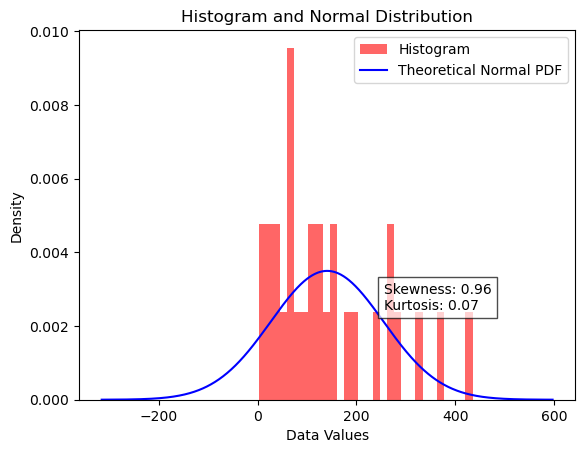

In [24]:
# Plot histogram and theoretical PDF
plt.hist(Durationt, bins=30, density=True, alpha=0.6, color='red', label='Histogram')
plt.plot(x, pdf, color='blue', label='Theoretical Normal PDF')

# Annotate skewness and kurtosis
plt.title('Histogram and Normal Distribution')
plt.xlabel('Data Values')
plt.ylabel('Density')
plt.legend()
plt.text(mean + std_dev, max(pdf) * 0.7, f'Skewness: {data_skewness:.2f}\nKurtosis: {data_kurtosis:.2f}', 
         bbox=dict(facecolor='white', alpha=0.7), fontsize=10)

plt.show()

Mean value: 140.73
Median value: 112.00
Mode value: 56.04


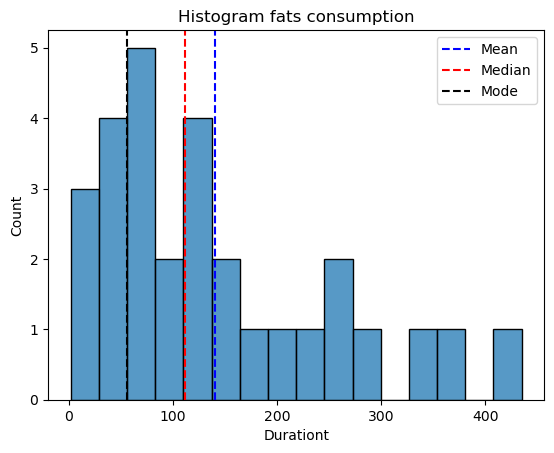

In [25]:
num_bins = 16

ax1 = sns.histplot(Durationt,bins=num_bins,legend=True)
# visualize the mean, median and mode:
avg_fats = np.mean(Durationt) #calculate mean
med_fats = np.median(Durationt) #calculate median
#draw the lines:
ax1.axvline(avg_fats, color="b",ls ="--" )
ax1.axvline(med_fats, color="r",ls ="--" )

#calculate the mode:
# use numpy to extract the bins and counts values.
count, val = np.histogram(Durationt, bins=num_bins)
#find the value for which the count is the maximum:
mode_fats = val[np.argmax(count)]
#plot
ax1.axvline(mode_fats, color="k",ls ="--" )
ax1.legend(["Mean","Median","Mode"])
ax1.set_title("Histogram fats consumption")


print("Mean value: %.2f" % avg_fats)
print("Median value: %.2f" % med_fats)
print("Mode value: %.2f" % mode_fats)

Text(0.5, 1.0, 'Duration consumption probability functions')

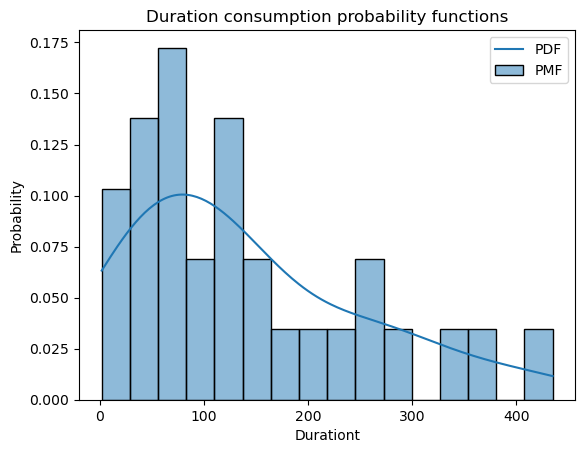

In [26]:
# specify that we want the pmf by inputting the stat parameter as "probability". 
# Use the kernel density estimation to plot the pdf.
ax2 = sns.histplot(Durationt,bins=num_bins,kde=True, stat="probability", legend=True)
ax2.legend(["PDF","PMF"])
ax2.set_title("Duration consumption probability functions")

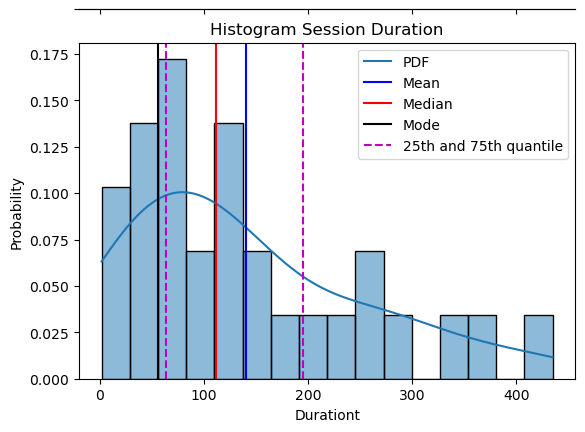

In [27]:
# define a subplot with 2 rows. 
# Specify also the plots ratio of 0.25 and 0.75 so that the boxplot occupies only 25% of the image height.
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.0, 1)})
sns.boxplot(x = Durationt, ax=ax_box)

sns.histplot(x = Durationt, ax=ax_hist,bins=num_bins,kde=True, stat="probability", legend=True)
ax_box.set(xlabel='')
ax_hist.axvline(avg_fats, color="b",ls ="-" )
ax_hist.axvline(med_fats, color="r",ls ="-" )
ax_hist.axvline(mode_fats, color="k",ls ="-" )
ax_hist.axvline(np.quantile(Durationt,0.25), color="m",ls ="--" )
ax_hist.axvline(np.quantile(Durationt,0.75), color="m",ls ="--" )

ax_hist.legend(["PDF","Mean","Median","Mode","25th and 75th quantile"])
ax_hist.set_title("Histogram Session Duration")

plt.show()


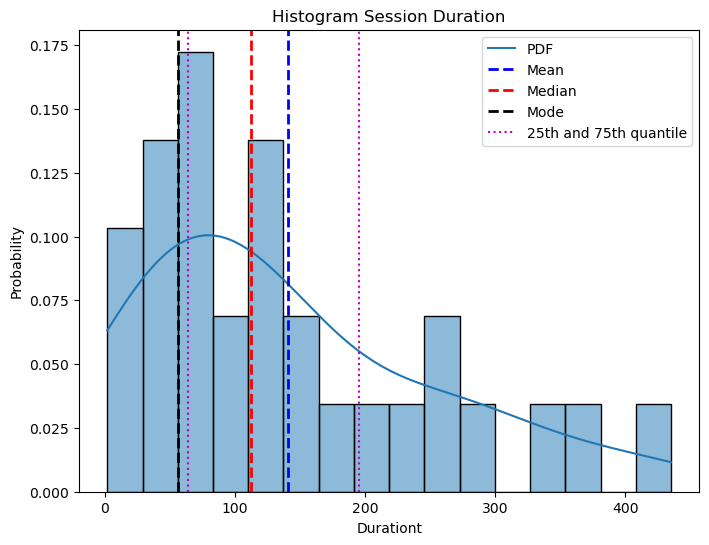

In [77]:
# Assuming `Durationt` and other variables are defined, like:
# Durationt = np.random.normal(loc=50, scale=10, size=1000)
# num_bins = 30
# avg_fats, med_fats, mode_fats are also defined appropriately

# Define a subplot with only the histogram (no box plot)
f, ax_hist = plt.subplots(figsize=(8, 6))

# Plot histogram
sns.histplot(x=Durationt, ax=ax_hist, bins=num_bins, kde=True, stat="probability", legend=True)

# Add vertical lines for mean, median, mode, and quantiles
ax_hist.axvline(avg_fats, color="b", ls="--", linewidth=2)
ax_hist.axvline(med_fats, color="r", ls="--", linewidth=2)
ax_hist.axvline(mode_fats, color="k", ls="--", linewidth=2)
ax_hist.axvline(np.quantile(Durationt, 0.25), color="m", ls="dotted")
ax_hist.axvline(np.quantile(Durationt, 0.75), color="m", ls="dotted")

# Add legend and title
ax_hist.legend(["PDF", "Mean", "Median", "Mode", "25th and 75th quantile"])
ax_hist.set_title("Probability Density Function")

plt.show()


In [69]:
print(skew(Durationt))
print(kurtosis(Durationt))

0.9585120810358149
0.06974592242244437
